# Imports

## Standard imports

In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.rcParams['axes.facecolor']='w'
#plt.rcParams['axes.linewidth']=1
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['figure.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'
#plt.rcParams['grid.color']='white'

# sns.set()

## Custom imports

In [3]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import FIGSIZE_CI, FIGSIZE_HEATMAP, DPI, PLOTS_DIR
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import plot_algorithm_dataset_comparison_heatmap

sys.path.insert(0, './notebooks')

## Datasets options

In [4]:
smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'extended'
assert grid_search_type in ['reproducing', 'extended']

# EDA

## Zero-variance Features Reductions (all togeter)

### Load data

In [5]:
if np.array([f'{dataset}_original_featuresets_to_zero_varaince_reductions.csv' in os.listdir('../tables') for dataset in ['freesolv', 'esol', 'lipophilicity']]).all():
    esol_reductions = pd.read_csv(f'../tables/esol_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)
    freesolv_reductions = pd.read_csv(f'../tables/freesolv_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)
    lipophilicity_reductions = pd.read_csv(f'../tables/lipophilicity_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)

In [6]:
# 642 rows
print('freesov')
display(freesolv_reductions)
print('-'*80)

# 1128 rows
print('esol')
display(esol_reductions)
print('-'*80)

# 4200 rows
print('lipophilicity')
display(lipophilicity_reductions)
print('-'*80)

freesov


,Original features,Reduced features,Reduction
RDKit,200,167,33
1024ecfp-4,1024,849,175
1024ecfp-6,1024,981,43
2048ecfp-4,2048,1224,824
2048ecfp-6,2048,1617,431


--------------------------------------------------------------------------------
esol


,Original features,Reduced features,Reduction
RDKit,200,180,20
1024ecfp-4,1024,1013,11
1024ecfp-6,1024,1024,0
2048ecfp-4,2048,1856,192
2048ecfp-6,2048,2030,18


--------------------------------------------------------------------------------
lipophilicity


,Original features,Reduced features,Reduction
RDKit,200,188,12
1024ecfp-4,1024,1024,0
1024ecfp-6,1024,1024,0
2048ecfp-4,2048,2047,1
2048ecfp-6,2048,2048,0


--------------------------------------------------------------------------------


### Plot

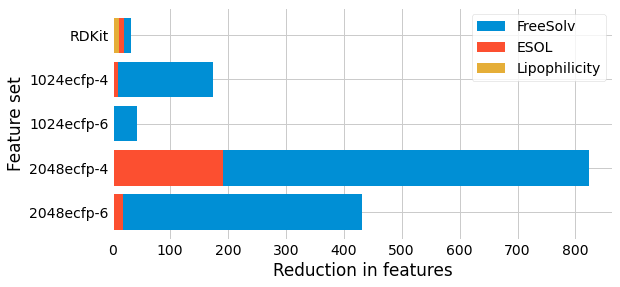

In [7]:
feature_sets_keys = ['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6'][::-1]
positions = range(len(feature_sets_keys))

plt.figure(figsize=(8, 4))
plt.tight_layout()

width = 0.8 # the width of the bars

f = plt.barh(positions, freesolv_reductions['Reduction'][::-1], width)
e = plt.barh(positions, esol_reductions['Reduction'][::-1], width)
l = plt.barh(positions, lipophilicity_reductions['Reduction'][::-1], width)

plt.yticks(positions, feature_sets_keys)
plt.ylabel('Feature set')
plt.xlabel('Reduction in features')

plt.legend((f[0], e[0], l[0]), ('FreeSolv', 'ESOL', 'Lipophilicity'))

# TODO: fix y-labels to fit the saved image
plt.savefig('../figures/eda/comparison_of_zero_var_feature_reduction_for_all_datasets.png', dpi=DPI, bbox_inches='tight')
plt.show()

# Reproducing Moleculenet

## Extended grid-search heatmaps

In [8]:
split = 'test' # will load test or validation set to plot heatmaps
assert split in ['val', 'test']

metric = 'RMSE'
assert metric in metrics_to_labels

### Load data

In [9]:
esol_full = pd.read_csv(f'../tables/esol_{smile_type}_{grid_search_type}_full_combined_{split}_{metric}_model_x_featureset_heatmap_df.csv', index_col=0)
esol_reduced = pd.read_csv(f'../tables/esol_{smile_type}_{grid_search_type}_reduced_combined_{split}_{metric}_model_x_featureset_heatmap_df.csv', index_col=0)

freesolv_full = pd.read_csv(f'../tables/freesolv_{smile_type}_{grid_search_type}_full_combined_{split}_{metric}_model_x_featureset_heatmap_df.csv', index_col=0)
lipophilicity_full = pd.read_csv(f'../tables/lipophilicity_{smile_type}_{grid_search_type}_full_combined_{split}_{metric}_model_x_featureset_heatmap_df.csv', index_col=0)

### ESOL full

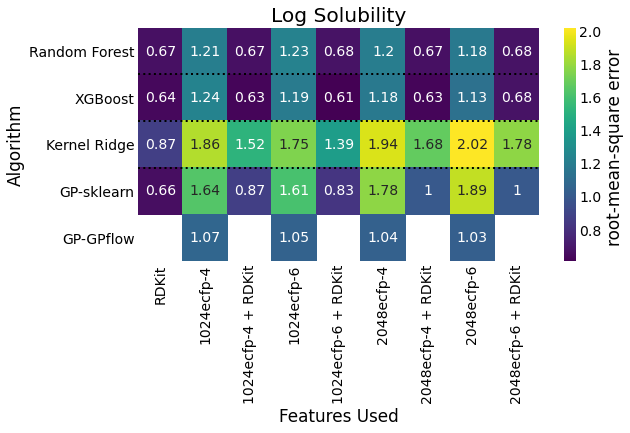

In [10]:
fig, ax = plot_algorithm_dataset_comparison_heatmap(esol_full, dataset='esol', metric=metric) 
fig.savefig(f'{PLOTS_DIR}/comparison_heatmaps/algorithm_comparison_esol_full_{split}_{metric}.png', dpi=DPI, bbox_inches='tight')

### ESOL reduced

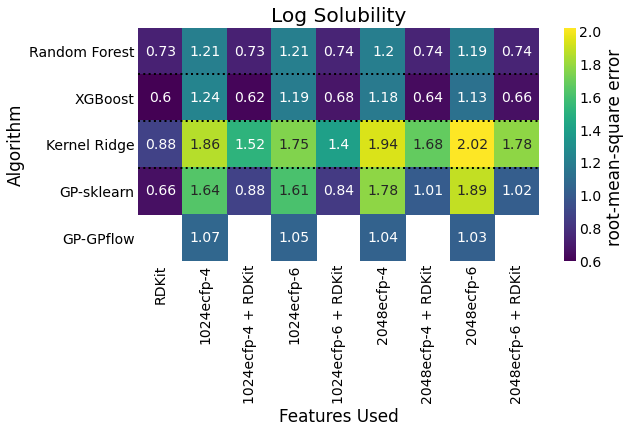

In [11]:
fig, ax = plot_algorithm_dataset_comparison_heatmap(esol_reduced, dataset='esol', metric=metric)
fig.savefig(f'{PLOTS_DIR}/comparison_heatmaps/algorithm_comparison_esol_reduced_{split}_{metric}.png', dpi=DPI, bbox_inches='tight')

### FreeSolv

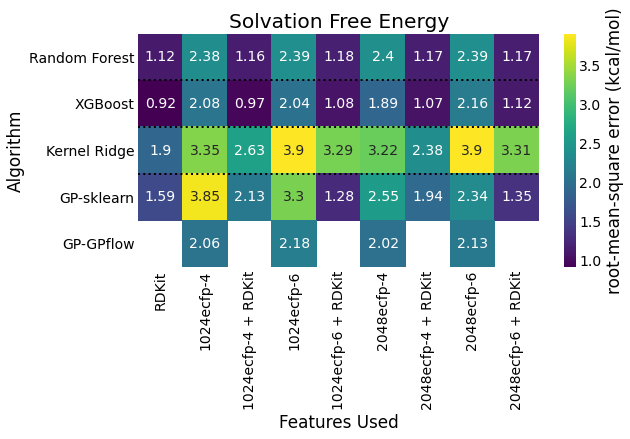

In [12]:
fig, ax = plot_algorithm_dataset_comparison_heatmap(freesolv_full, dataset='freesolv', metric=metric)
fig.savefig(f'{PLOTS_DIR}/comparison_heatmaps/algorithm_comparison_freesolv_full_{split}_{metric}.png', dpi=DPI, bbox_inches='tight')

### Lipophilicity

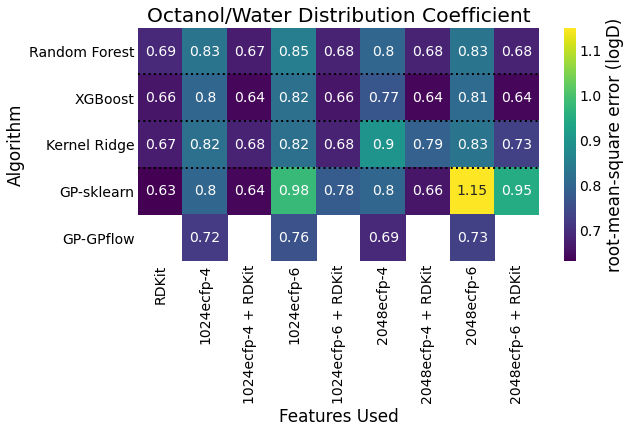

In [13]:
fig, ax = plot_algorithm_dataset_comparison_heatmap(lipophilicity_full, dataset='lipophilicity', metric=metric)
fig.savefig(f'{PLOTS_DIR}/comparison_heatmaps/algorithm_comparison_lipophilicity_full_{split}_{metric}.png', dpi=DPI, bbox_inches='tight')

# CI plots

All CI plots are produced in:
`prepare_and_plot_extended_ci_rf_and_gp_results.ipnb`